<a href="https://colab.research.google.com/github/ShohamWeiss/Statistics/blob/master/Time_Series_Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get time series data from pc

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving data-ebola-public-xlsx-1.csv to data-ebola-public-xlsx-1.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['data-ebola-public-xlsx-1.csv']))

# Analyze the data and take only 1 category and 1 source

In [ ]:
# take a look
df.head()

,Country,Localite,Category,Value,Date,Sources,Link
0,Guinea,"Guekedou, Macenta, Nzerekore and Kissidougou",Cases,86,3/24/2014,WHO,http://reliefweb.int/sites/reliefweb.int/files...
1,Guinea,"Guekedou, Macenta, Nzerekore and Kissidougou",Deaths,59,3/24/2014,WHO,http://reliefweb.int/sites/reliefweb.int/files...
2,Guinea,"( Guekedou, Macenta and Kissidougou",Cases,86,3/25/2014,WHO,http://reliefweb.int/sites/reliefweb.int/files...
3,Guinea,"( Guekedou, Macenta and Kissidougou",Deaths,60,3/25/2014,WHO,http://reliefweb.int/sites/reliefweb.int/files...
4,Guinea,"( Guekedou, Macenta and Kissidougou",Cases,86,3/26/2014,WHO,http://reliefweb.int/report/guinea/fi-vre-h-mo...


In [ ]:
# filter to category: deaths and sources: WHO
df = df[(df['Category'] == 'Deaths') & (df.Sources == 'WHO')]
df

,Country,Localite,Category,Value,Date,Sources,Link
1,Guinea,"Guekedou, Macenta, Nzerekore and Kissidougou",Deaths,59,3/24/2014,WHO,http://reliefweb.int/sites/reliefweb.int/files...
3,Guinea,"( Guekedou, Macenta and Kissidougou",Deaths,60,3/25/2014,WHO,http://reliefweb.int/sites/reliefweb.int/files...
5,Guinea,"( Guekedou, Macenta and Kissidougou)",Deaths,62,3/26/2014,WHO,http://reliefweb.int/report/guinea/fi-vre-h-mo...
7,Guinea,"( Guekedou, Macenta and Kissidougou)",Deaths,66,3/27/2014,WHO,http://reliefweb.int/report/guinea/ebola-haemo...
8,Guinea,"( Guekedou, Macenta,Kissidougou,Lofa,Kankan an...",Deaths,70,3/28/2014,WHO,http://reliefweb.int/report/guinea/situation-d...
...,...,...,...,...,...,...,...
26351,Mali,Koulikoro,Deaths,0,11/25/2014,WHO,http://www.clustersantemali.net/docs/Epidemio/...
26357,Mali,Kourémalé,Deaths,0,11/25/2014,WHO,http://www.clustersantemali.net/docs/Epidemio/...
26363,Mali,Koutiala,Deaths,0,11/25/2014,WHO,http://www.clustersantemali.net/docs/Epidemio/...
26369,Mali,National,Deaths,6,11/25/2014,WHO,http://www.clustersantemali.net/docs/Epidemio/...


In [ ]:
# Make date the index
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y')
df = df.set_index('Date')
df

,Country,Localite,Category,Value,Sources,Link
Date,,,,,,
2014-03-24,Guinea,"Guekedou, Macenta, Nzerekore and Kissidougou",Deaths,59,WHO,http://reliefweb.int/sites/reliefweb.int/files...
2014-03-25,Guinea,"( Guekedou, Macenta and Kissidougou",Deaths,60,WHO,http://reliefweb.int/sites/reliefweb.int/files...
2014-03-26,Guinea,"( Guekedou, Macenta and Kissidougou)",Deaths,62,WHO,http://reliefweb.int/report/guinea/fi-vre-h-mo...
2014-03-27,Guinea,"( Guekedou, Macenta and Kissidougou)",Deaths,66,WHO,http://reliefweb.int/report/guinea/ebola-haemo...
2014-03-28,Guinea,"( Guekedou, Macenta,Kissidougou,Lofa,Kankan an...",Deaths,70,WHO,http://reliefweb.int/report/guinea/situation-d...
...,...,...,...,...,...,...
2014-11-25,Mali,Koulikoro,Deaths,0,WHO,http://www.clustersantemali.net/docs/Epidemio/...
2014-11-25,Mali,Kourémalé,Deaths,0,WHO,http://www.clustersantemali.net/docs/Epidemio/...
2014-11-25,Mali,Koutiala,Deaths,0,WHO,http://www.clustersantemali.net/docs/Epidemio/...


In [ ]:
# Set Column Value to integer
df['Value'] = pd.to_numeric(df['Value'], downcast='integer')
df

,Country,Localite,Category,Value,Sources,Link
Date,,,,,,
2014-03-24,Guinea,"Guekedou, Macenta, Nzerekore and Kissidougou",Deaths,59.0,WHO,http://reliefweb.int/sites/reliefweb.int/files...
2014-03-25,Guinea,"( Guekedou, Macenta and Kissidougou",Deaths,60.0,WHO,http://reliefweb.int/sites/reliefweb.int/files...
2014-03-26,Guinea,"( Guekedou, Macenta and Kissidougou)",Deaths,62.0,WHO,http://reliefweb.int/report/guinea/fi-vre-h-mo...
2014-03-27,Guinea,"( Guekedou, Macenta and Kissidougou)",Deaths,66.0,WHO,http://reliefweb.int/report/guinea/ebola-haemo...
2014-03-28,Guinea,"( Guekedou, Macenta,Kissidougou,Lofa,Kankan an...",Deaths,70.0,WHO,http://reliefweb.int/report/guinea/situation-d...
...,...,...,...,...,...,...
2014-11-25,Mali,Koulikoro,Deaths,0.0,WHO,http://www.clustersantemali.net/docs/Epidemio/...
2014-11-25,Mali,Kourémalé,Deaths,0.0,WHO,http://www.clustersantemali.net/docs/Epidemio/...
2014-11-25,Mali,Koutiala,Deaths,0.0,WHO,http://www.clustersantemali.net/docs/Epidemio/...


In [ ]:
# make a copy of value to a new column
df['Missing_Data'] = df['Value']
df

,Country,Localite,Category,Value,Sources,Link,Missing_Data
Date,,,,,,,
2014-03-24,Guinea,"Guekedou, Macenta, Nzerekore and Kissidougou",Deaths,59.0,WHO,http://reliefweb.int/sites/reliefweb.int/files...,59.0
2014-03-25,Guinea,"( Guekedou, Macenta and Kissidougou",Deaths,60.0,WHO,http://reliefweb.int/sites/reliefweb.int/files...,60.0
2014-03-26,Guinea,"( Guekedou, Macenta and Kissidougou)",Deaths,62.0,WHO,http://reliefweb.int/report/guinea/fi-vre-h-mo...,62.0
2014-03-27,Guinea,"( Guekedou, Macenta and Kissidougou)",Deaths,66.0,WHO,http://reliefweb.int/report/guinea/ebola-haemo...,66.0
2014-03-28,Guinea,"( Guekedou, Macenta,Kissidougou,Lofa,Kankan an...",Deaths,70.0,WHO,http://reliefweb.int/report/guinea/situation-d...,70.0
...,...,...,...,...,...,...,...
2014-11-25,Mali,Koulikoro,Deaths,0.0,WHO,http://www.clustersantemali.net/docs/Epidemio/...,0.0
2014-11-25,Mali,Kourémalé,Deaths,0.0,WHO,http://www.clustersantemali.net/docs/Epidemio/...,0.0
2014-11-25,Mali,Koutiala,Deaths,0.0,WHO,http://www.clustersantemali.net/docs/Epidemio/...,0.0


In [ ]:
# Only look at Value and Missing_Data Columns
df = df.filter(['Value', 'Missing_Data'])
df

,Value,Missing_Data
Date,,
2014-03-24,59.0,59.0
2014-03-25,60.0,60.0
2014-03-26,62.0,62.0
2014-03-27,66.0,66.0
2014-03-28,70.0,70.0
...,...,...
2014-11-25,0.0,0.0
2014-11-25,0.0,0.0
2014-11-25,0.0,0.0


In [ ]:
# Order by datetime
df = df.groupby(df.index).sum()
print(df.shape)
print(df.tail())

(55, 2)
            Value  Missing_Data
Date                           
2014-11-15   10.0          10.0
2014-11-19   10.0          10.0
2014-11-23   12.0          12.0
2014-11-24   12.0          12.0
2014-11-25   12.0          12.0


In [ ]:
# randomly delete 20 rows of data in "missing_data"
indexes = df.sample(10).index
df.loc[indexes, 'Missing_Data'] = np.NaN
df.tail()

,Value,Missing_Data
Date,,
2014-11-15,10.0,10.0
2014-11-19,10.0,10.0
2014-11-23,12.0,NaN
2014-11-24,12.0,12.0
2014-11-25,12.0,12.0


In [ ]:
# confirm we have 20 missing
df = df.assign(missing=np.nan)
df.missing[df['Missing_Data'].isna()] = df["Value"]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2014-03-24 to 2014-11-25
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Value         55 non-null     float64
 1   Missing_Data  45 non-null     float64
 2   missing       10 non-null     float64
dtypes: float64(3)
memory usage: 1.7 KB


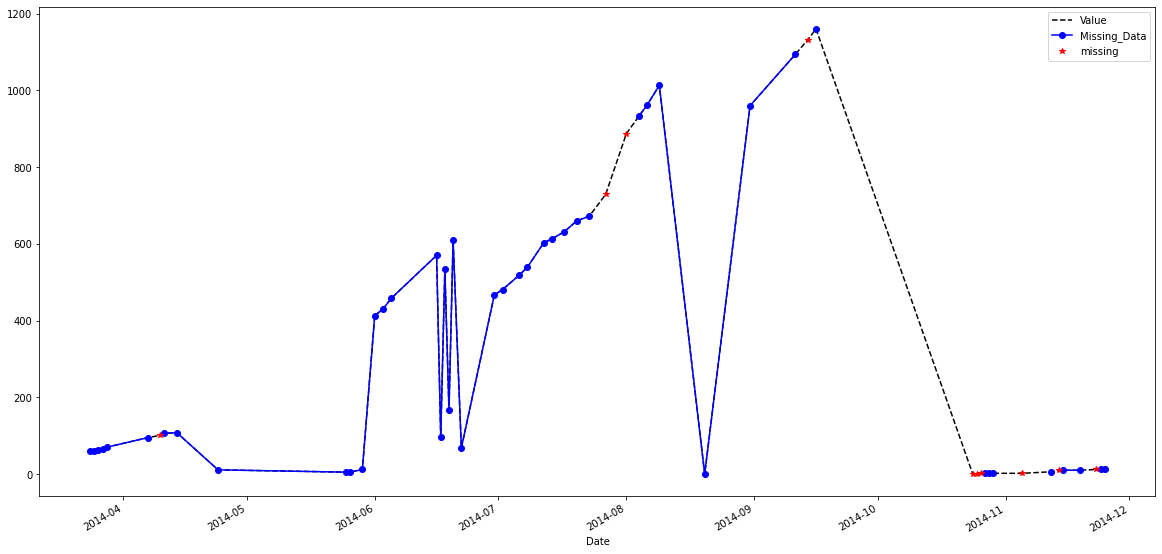

In [ ]:
# take a look
df.plot(style=['k--', 'bo-', 'r*'], figsize=(20,10))

# Try to impute missing data points with several methods

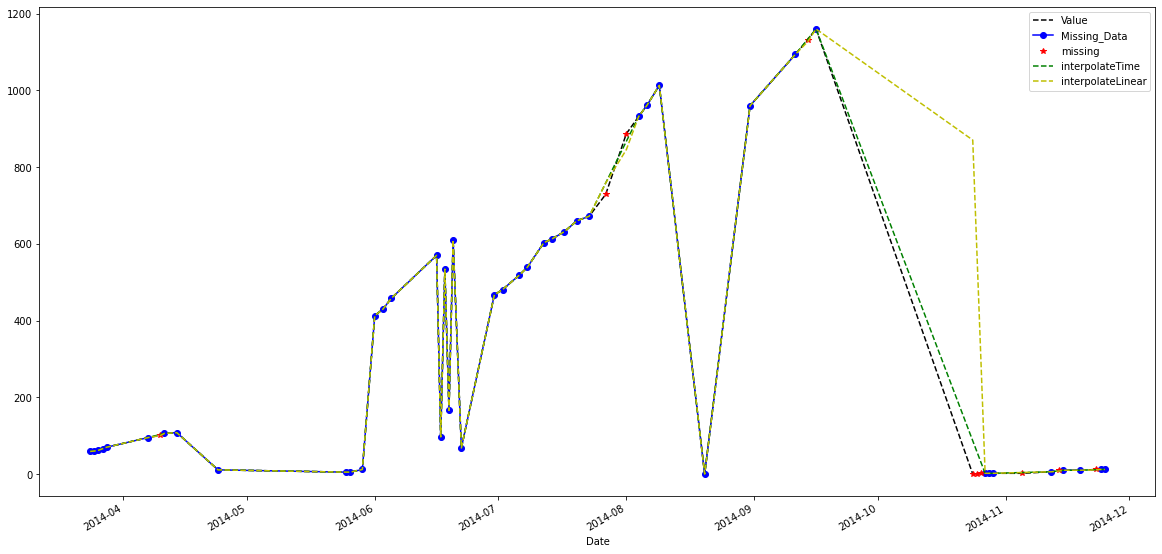

In [ ]:
# Method 1 interpolate time
df = df.assign(interpolateTime=df.Missing_Data.interpolate(method='time'))
df = df.assign(interpolateLinear = df.Missing_Data.interpolate())
df.plot(style=['k--', 'bo-', 'r*', 'g--', 'y--'], figsize=(20,10))

In [ ]:
from sklearn.metrics import r2_score
# Scoring
results = [ ('InterpTime', r2_score(df.Value, df.interpolateTime))]
print(results)

[('InterpTime', 0.998281704593304)]


In [ ]:
# Pandas read from string

In [ ]:
myString = 'Date\tValue\n1-4-2012\t34\n1-5-2012\t38.3\n1-6-2012\t45'
print(myString)
testdata = io.StringIO(myString)
df2 = pd.read_csv(testdata, '\t')
df2

Date	Value
1-4-2012	34
1-5-2012	38.3
1-6-2012	45


,Date,Value
0,1-4-2012,34.0
1,1-5-2012,38.3
2,1-6-2012,45.0


In [ ]:
df2.Date = pd.to_datetime(df2.Date)
df2 = df2.set_index('Date')
df2

,Value
Date,
2012-01-04,34.0
2012-01-05,38.3
2012-01-06,45.0


In [ ]:
df2['Value'] = pd.to_numeric(df2['Value'], downcast='integer')
type(df2.Value[1])

In [ ]:
df2 = df2.assign(interp = df2['Value'].interpolate(method='linear'))
df2

,Value,interp
Date,,
2012-01-04,34.0,34.0
2012-01-05,38.3,38.3
2012-01-06,45.0,45.0


In [ ]:
import pandas as pd
df = pd.DataFrame({'A':[1,2]})
df = df.append(pd.Series(), ignore_index=True)
df
import datetime
today = datetime.date(2012,10,1)
df.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: ignored

In [ ]:
import pandas as pd

number_of_rows = input()
data = []
for i in range(int(number_of_rows)):
    x = input()
    data.append(int(x))

df = pd.DataFrame(data, columns=['data'])
df.data = pd.to_numeric(df.data, downcast= 'integer')
df = df.append(pd.Series(), ignore_index=True)
print(df)